## matplotlib and seaborn essentials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

### Common plots with matplotlib

In [2]:
y = np.random.randn(1000)

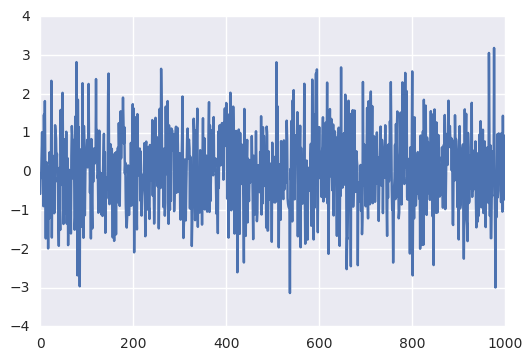

In [3]:
plt.plot(y)

In [4]:
x = np.linspace(-10., 10., 1000)
y = np.sin(3 * x) * np.exp(-.1 * x**2)

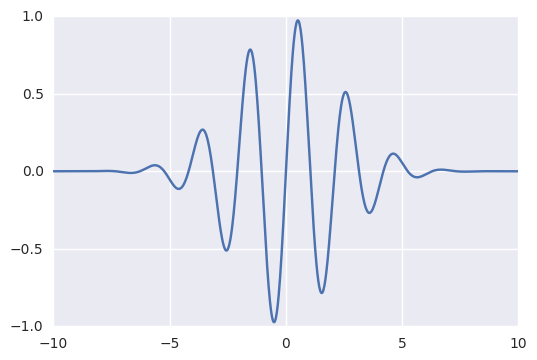

In [5]:
plt.plot(x, y)

In [6]:
x = np.linspace(-5., 5., 100)
y = np.sin(3 * x) * np.exp(-.1 * x ** 2)

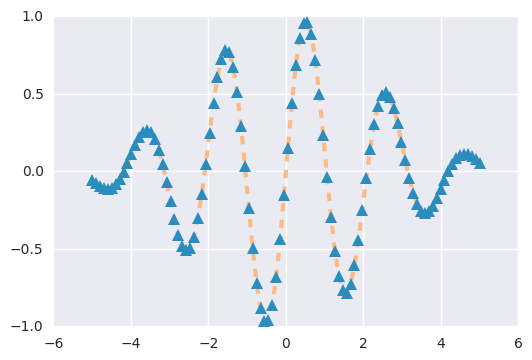

In [7]:
plt.plot(x, y, '--^',
         lw=3, color='#fdbb84',
         mfc='#2b8cbe', ms=8)

In [19]:
x = np.random.randn(100)
y = x + np.random.randn(100)

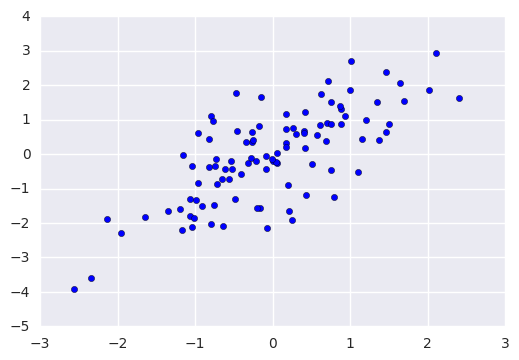

In [21]:
import mpld3
mpld3.enable_notebook()
plt.scatter(x, y)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins

# Define some CSS to control our custom labels
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

N = 50
df = pd.DataFrame(index=range(N))
df['x'] = np.random.randn(N)
df['y'] = np.random.randn(N)
df['z'] = np.random.randn(N)

labels = []
for i in range(N):
    label = df.ix[[i], :].T
    label.columns = ['Row {0}'.format(i)]
    # .to_html() is unicode; so make leading 'u' go away with str()
    labels.append(str(label.to_html()))

points = ax.plot(df.x, df.y, 'o', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('HTML tooltips', size=20)

tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)

mpld3.display()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins, utils


class LinkedView(plugins.PluginBase):
    """A simple plugin showing how multiple axes can be linked"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline", "data"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line = mpld3.get_element(this.props.idline);
      var data = this.props.data;

      function mouseover(d, i){
        line.data = data[i];
        line.elements().transition()
            .attr("d", line.datafunc(line.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line, linedata):
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "data": linedata}

fig, ax = plt.subplots(2)

# scatter periods and amplitudes
np.random.seed(0)
P = 0.2 + np.random.random(size=20)
A = np.random.random(size=20)
x = np.linspace(0, 10, 100)
data = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])
points = ax[1].scatter(P, A, c=P + A,
                       s=200, alpha=0.5)
ax[1].set_xlabel('Period')
ax[1].set_ylabel('Amplitude')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
ax[0].set_ylim(-1, 1)

ax[0].set_title("Hover over points to see lines")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
plugins.connect(fig, LinkedView(points, lines[0], linedata))

mpld3.displa

## Customizing matplotlib figures

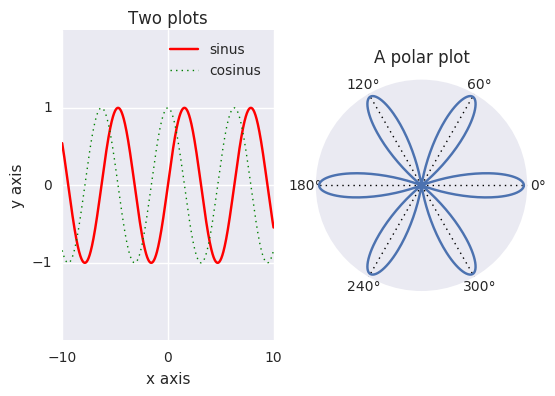

In [11]:
# Left panel.
plt.subplot(1, 2, 1)
x = np.linspace(-10., 10., 1000)
plt.plot(x, np.sin(x), '-r', label='sinus')
plt.plot(x, np.cos(x), ':g', lw=1, label='cosinus')
plt.xticks([-10, 0, 10])
plt.yticks([-1, 0, 1])
plt.ylim(-2, 2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Two plots")
plt.legend()

# Right panel.
plt.subplot(1, 2, 2, polar=True)
x = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x, 1 + 2 * np.cos(6 * x))
plt.yticks([])
plt.xlim(-.1, 3.1)
plt.ylim(-.1, 3.1)
plt.xticks(np.linspace(0, 5 * np.pi / 3, 6))
plt.title("A polar plot")
plt.grid(color='k', linewidth=1, linestyle=':')

### Interacting with matplotlib figures in the Notebook

In [12]:
from ipywidgets import interact

In [13]:
x = np.linspace(-5., 5., 1000)

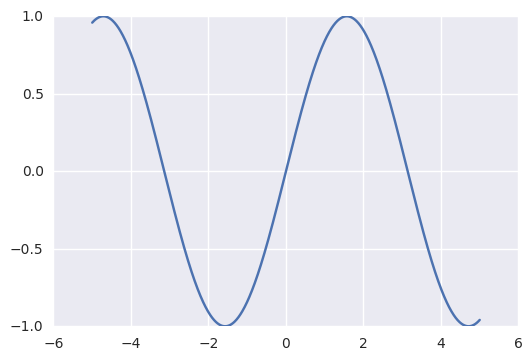

In [14]:
@interact
def plot_sin(a=(1, 10)):
    plt.plot(x, np.sin(a*x))
    plt.ylim(-1, 1)

In [15]:
%matplotlib qt

ImportError: No module named PyQt4

In [15]:
lines = plt.plot([0, 1], [0, 1], 'b')

In [16]:
lines

In [17]:
lines[0].set_color('r')
plt.draw()

### High-level plotting with seaborn

In [16]:
df = seaborn.load_dataset("iris")
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


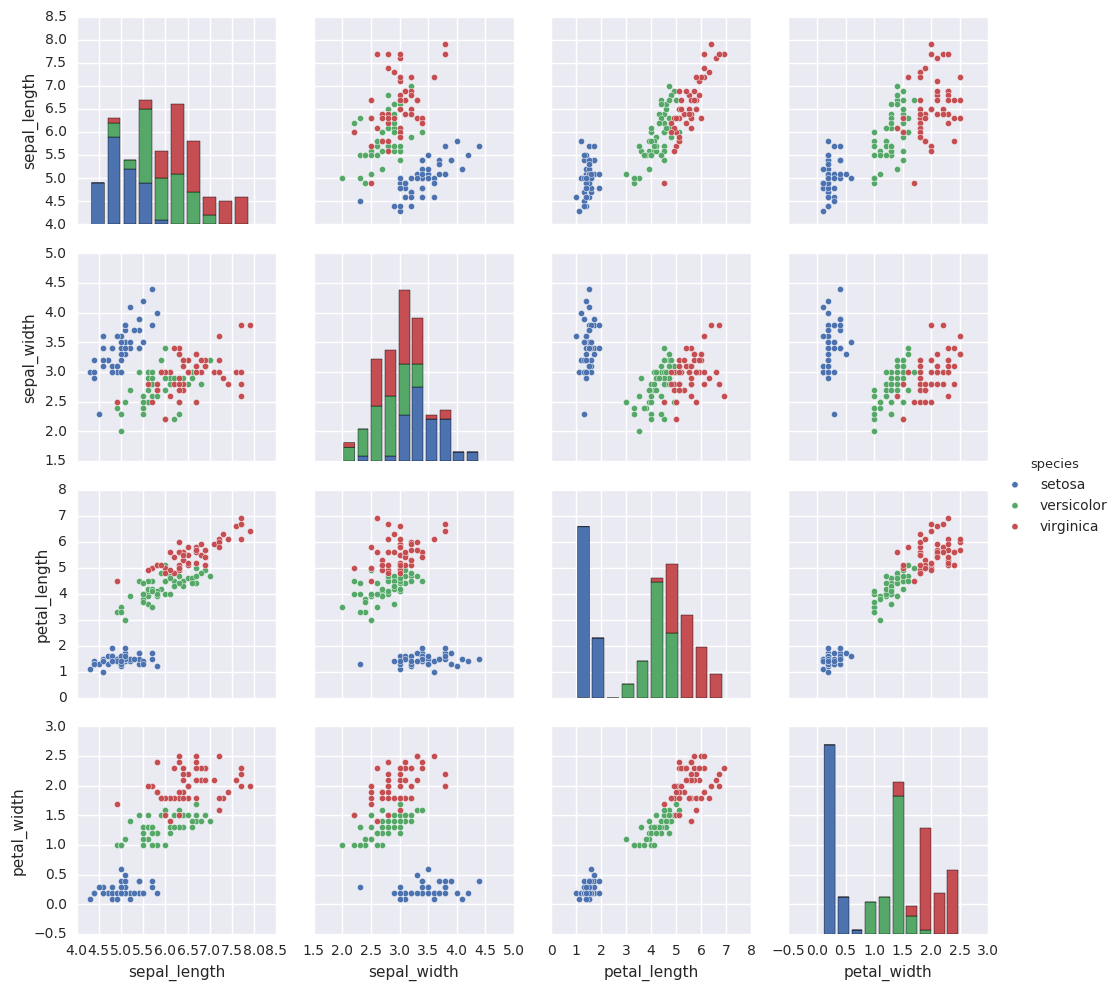

In [17]:
seaborn.pairplot(df, hue="species", size=2.5)